In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2022-11-06 01:08:52.693434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
obs=1000

xs=np.random.uniform(-10,10,(obs,1))
zs=np.random.uniform(-10,10,(obs,1))
generated_input=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(obs,1))
generated_target=2*xs-3*zs+5+noise
np.savez("TensorFlowIntro",inputs=generated_input, targets=generated_target)

## Solving problems  with tensorflow

In [8]:
#input the data
training_data=np.load("TensorFlowIntro.npz")

#introduce the model
input_size=2
output_size=1

model=tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

#introduce the optimization function
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

2022-11-06 04:50:59.263064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
32/32 - 8s - loss: 36.7489 - 8s/epoch - 248ms/step
Epoch 2/100
32/32 - 1s - loss: 4.5932 - 799ms/epoch - 25ms/step
Epoch 3/100
32/32 - 1s - loss: 1.4995 - 600ms/epoch - 19ms/step
Epoch 4/100
32/32 - 1s - loss: 0.6639 - 664ms/epoch - 21ms/step
Epoch 5/100
32/32 - 1s - loss: 0.4410 - 721ms/epoch - 23ms/step
Epoch 6/100
32/32 - 1s - loss: 0.3760 - 623ms/epoch - 19ms/step
Epoch 7/100
32/32 - 1s - loss: 0.3562 - 802ms/epoch - 25ms/step
Epoch 8/100
32/32 - 1s - loss: 0.3640 - 751ms/epoch - 23ms/step
Epoch 9/100
32/32 - 1s - loss: 0.3594 - 1s/epoch - 33ms/step
Epoch 10/100
32/32 - 1s - loss: 0.3588 - 699ms/epoch - 22ms/step
Epoch 11/100
32/32 - 1s - loss: 0.3546 - 516ms/epoch - 16ms/step
Epoch 12/100
32/32 - 1s - loss: 0.3550 - 803ms/epoch - 25ms/step
Epoch 13/100
32/32 - 1s - loss: 0.3574 - 736ms/epoch - 23ms/step
Epoch 14/100
32/32 - 1s - loss: 0.3531 - 686ms/epoch - 21ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3613 - 497ms/epoch - 16ms/step
Epoch 16/100
32/32 - 1s - loss: 0.3583

## extract weights and bias

In [10]:
model.layers[0].get_weights()

[array([[ 1.9779793],
        [-3.0006757]], dtype=float32),
 array([5.0052795], dtype=float32)]

In [12]:
weights=model.layers[0].get_weights()[0]
weights

array([[ 1.9779793],
       [-3.0006757]], dtype=float32)

In [14]:
bias=model.layers[0].get_weights()[1]
bias

array([5.0052795], dtype=float32)

- This is precisly our weight and bias values from the generated_target formula. We are right on track, baby!

## Extract outputs(make predictions and compare with the targets)

In [16]:
model.predict_on_batch(training_data['inputs']).round(1)


array([[  4.4],
       [ 30.6],
       [-16.3],
       [-10. ],
       [-23.7],
       [ 22.5],
       [ 33.1],
       [  7. ],
       [ 12.3],
       [-25.9],
       [ 11.1],
       [ -1.9],
       [  1. ],
       [ 20.4],
       [ 38.2],
       [ 22.6],
       [ 39.5],
       [ 17.9],
       [ 29.9],
       [-17.9],
       [ 32.4],
       [ 27.8],
       [ -1.9],
       [ 12. ],
       [ 15.2],
       [-29.4],
       [ -4. ],
       [ -3.6],
       [-13.8],
       [ -1.5],
       [  9.8],
       [  1.3],
       [-17.5],
       [  4.5],
       [-12.4],
       [ 25.8],
       [ -6. ],
       [  6.4],
       [ 32.7],
       [ 20.2],
       [  7.7],
       [-41.1],
       [-12.2],
       [  1.7],
       [-36.9],
       [ 33.1],
       [-15.1],
       [-30.5],
       [-20.5],
       [ 29.6],
       [ 18.1],
       [ 11.1],
       [ 12.1],
       [ -7.2],
       [ -4.6],
       [ -2.4],
       [ 23.8],
       [  0.1],
       [ -7.1],
       [  6. ],
       [ 27.9],
       [ -2.8],
       [

In [17]:
training_data['targets'].round(1)

array([[  4.1],
       [ 31.2],
       [-16.2],
       [ -9.9],
       [-23.9],
       [ 22.6],
       [ 32.4],
       [  7. ],
       [ 11.6],
       [-27. ],
       [ 10.9],
       [ -1.9],
       [  1.4],
       [ 20.3],
       [ 39.1],
       [ 22.8],
       [ 40.1],
       [ 17.2],
       [ 30.1],
       [-16.9],
       [ 33.4],
       [ 28.1],
       [ -2. ],
       [ 11.2],
       [ 15.7],
       [-30.3],
       [ -4.1],
       [ -4.5],
       [-14.8],
       [ -0.6],
       [ 10.3],
       [  2.1],
       [-18.4],
       [  4.3],
       [-12.4],
       [ 25.7],
       [ -6.7],
       [  7.3],
       [ 32. ],
       [ 20.2],
       [  7.1],
       [-41.1],
       [-12.1],
       [  0.9],
       [-37.8],
       [ 32.4],
       [-14.8],
       [-31.6],
       [-21.3],
       [ 29.8],
       [ 18.9],
       [ 11. ],
       [ 12.3],
       [ -7.7],
       [ -5.6],
       [ -2.3],
       [ 23.4],
       [  1.2],
       [ -6.6],
       [  6.1],
       [ 28.2],
       [ -2.9],
       [

## plot the output against target

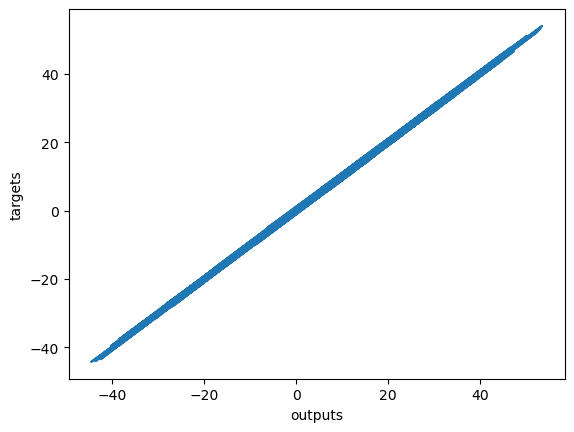

In [18]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs']).round(1)
),np.squeeze(training_data['targets'].round(1)))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()